<a href="https://colab.research.google.com/github/akshayonly/BioNER-MeSH-Net-Graph/blob/main/mesh_vs_ner_pubmed_abstract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Scientific Articles as a Network Graph

In this article, we'd explore BioNER and MeSH terms for building and visualizing network graphs of any PubMed articles.

CONTENT
1. Introduction
2. PubMed, Medline & Entrez
3. Medical subject headings (MeSH)
4. Biological Named-entity recognition (BioNER)
5. Building & Visualising Graphs with Networkx & Pyvis
6. Abstract as Network Graph
7. MeSH terms as Network Graph
8. Conclusion
9. Summary
10. References

## Introduction

In [1]:
# Pass

## PubMed, Medline & Entrez

In [2]:
!pip install -q biopython

     |████████████████████████████████| 2.3 MB 16.3 MB/s 


In [3]:
from Bio import Entrez
from Bio import Medline

In [4]:
def fetch_data(pmids):
    """Returns MEDLINE record associated with the PMID(s)"""
    
    Entrez.email = 'akishirsath@gmail.com'

    # Extracting MEDLINE record for the given PMID(s)
    handle = Entrez.efetch(db="pubmed", 
                           id=pmids, 
                           rettype="medline", 
                           retmode="text")

    # Parsing the XML format 
    records = Medline.parse(handle)    
    
    return list(records)

In [5]:
pmid = '29614878'
data = fetch_data(pmid)

In [6]:
data_dict = data[0]

In [7]:
data_dict

{'AB': "OBJECTIVES: To provide a clinical update for general psychiatrists on the assessment and diagnosis of Alzheimer's disease (AD), highlighting current issues regarding epidemiology, risk factors and pathophysiology from recent relevant research findings. CONCLUSIONS: Psychiatrists can apply their skills and training in the diagnosis of AD, which is based upon a comprehensive assessment comprising history, investigations, and cognitive and functional assessment, guided by accepted diagnostic criteria.",
 'AD': ['Neuropsychiatrist, Neuropsychiatry Unit, Royal Melbourne Hospital, Parkville, VIC, and; Melbourne Neuropsychiatry Centre, University of Melbourne, and; NorthWestern Mental Health, Melbourne, VIC, Australia.',
  'Neuropsychiatrist, Neuropsychiatry Unit, Royal Melbourne Hospital, Parkville, VIC, and; Department of Psychiatry, University of Melbourne, and; NorthWestern Mental Health, Melbourne, VIC, Australia.',
  'Neuropsychiatrist, Neuropsychiatry Unit, Royal Melbourne Hosp

In [8]:
for field_desc, data in (data_dict.items()):
  print(f"{field_desc}\t{data}")

PMID	29614878
OWN	NLM
STAT	MEDLINE
DCOM	20190405
LR	20190405
IS	1440-1665 (Electronic) 1039-8562 (Linking)
VI	26
IP	4
DP	2018 Aug
TI	Alzheimer's disease: clinical update on epidemiology, pathophysiology and diagnosis.
PG	347-357
LID	10.1177/1039856218762308 [doi]
AB	OBJECTIVES: To provide a clinical update for general psychiatrists on the assessment and diagnosis of Alzheimer's disease (AD), highlighting current issues regarding epidemiology, risk factors and pathophysiology from recent relevant research findings. CONCLUSIONS: Psychiatrists can apply their skills and training in the diagnosis of AD, which is based upon a comprehensive assessment comprising history, investigations, and cognitive and functional assessment, guided by accepted diagnostic criteria.
FAU	['Eratne, Dhamidhu', 'Loi, Samantha M', 'Farrand, Sarah', 'Kelso, Wendy', 'Velakoulis, Dennis', 'Looi, Jeffrey Cl']
AU	['Eratne D', 'Loi SM', 'Farrand S', 'Kelso W', 'Velakoulis D', 'Looi JC']
AD	['Neuropsychiatrist, Neuropsy

## Medical Subject Headings (MeSH)

In [9]:
data_dict.get('MH', 'NONE')

['*Alzheimer Disease/diagnosis/epidemiology/physiopathology', 'Humans']

## Biological Named-entity recognition (BioNER)

Biomedical named entity recognition (BioNER) is an important and challenging task for understanding biomedical texts. It aims to recognize named entities (NEs), such as diseases, gene, species, etc., in biomedical texts and plays an important role in many downstream natural language processing (NLP) tasks, such as drug-drug interaction task and knowledge base completion

In [10]:
!pip install -q nxviz
!pip install -q scispacy
!pip install -q https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz

     |████████████████████████████████| 4.8 MB 41.9 MB/s 
     |████████████████████████████████| 6.4 MB 40.0 MB/s 
     |████████████████████████████████| 11.2 MB 58.9 MB/s 
     |████████████████████████████████| 895 kB 55.3 MB/s 
     |████████████████████████████████| 76 kB 5.4 MB/s 
     |████████████████████████████████| 1.1 MB 58.1 MB/s 
     |████████████████████████████████| 216 kB 54.0 MB/s 
     |████████████████████████████████| 181 kB 55.8 MB/s 
     |████████████████████████████████| 558 kB 45.9 MB/s 
     |████████████████████████████████| 130 kB 66.1 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatib

In [11]:
import scispacy
import spacy

nlp = spacy.load("en_ner_bc5cdr_md")

In [12]:
sample_text = """Alzheimer's disease (AD) is a neurodegenerative disease that 
usually starts slowly and progressively worsens.[2] It is the cause of 60–70% 
of cases of dementia.[2][11] The most common early symptom is difficulty in 
remembering recent events.[1] As the disease advances, symptoms can include 
problems with language, disorientation (including easily getting lost), 
mood swings, loss of motivation, self-neglect, and behavioral issues.[2] 
As a person's condition declines, they often withdraw from family and society.
[12] Gradually, bodily functions are lost, ultimately leading to death.[13] 
Although the speed of progression can vary, 
the typical life expectancy following diagnosis is three to nine years.[9][14]"""

In [13]:
doc = nlp(sample_text)
print("TEXT", "START", "END", "ENTITY TYPE")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

TEXT START END ENTITY TYPE
Alzheimer's disease 0 19 DISEASE
neurodegenerative disease 30 55 DISEASE
60–70 133 138 CHEMICAL
disorientation 319 333 DISEASE
self-neglect 401 413 DISEASE


## Building & Visualising Graphs with Networkx & Pyvis

Wikipedia defines graphs as:
> "[...] a graph is a structure amounting to a set of objects in which some pairs of the objects are in some sense 'related'. The objects correspond to mathematical abstractions called vertices (also called nodes or points) and each of the related pairs of vertices is called an edge (also called link or line)."

Graphs help in visualising and defining "relationship" between "components". Components are nodes or vertices and their relationship are link or edges between this components. Take a look at below image.

Now that being said, let's try to create our own graph. 

In [14]:
!pip install -q networkx
!pip install -q pyvis

### Networkx

Create an empty graph with no nodes and no edges.

In [15]:
import networkx as nx

G = nx.Graph()

The graph G can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. To get started though we’ll look at simple manipulations. You can add one node at a time,

In [16]:
G.add_node(1)

or add nodes from any iterable container, such as a list

In [17]:
G.add_nodes_from([2, 3, 4, 5, 6])

By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [18]:
G.add_edge(1, 2)

In [19]:
edges_list = [(1, 5), (2, 3), (2, 5), (3, 4), (4, 5), (4, 6)]

G.add_edges_from(edges_list)

In [20]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [21]:
G.edges()

EdgeView([(1, 2), (1, 5), (2, 3), (2, 5), (3, 4), (4, 5), (4, 6)])

In [22]:
!pip install -q matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 33.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nxviz 0.7.3 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


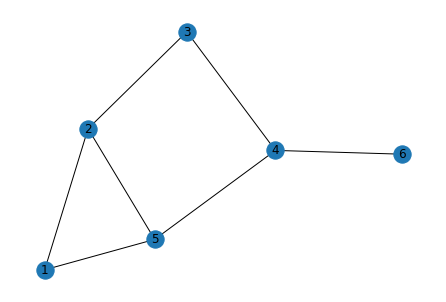

In [23]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)
plt.show() 

In [24]:
G.number_of_edges()

7

In [25]:
G.number_of_nodes()

6

In [26]:
list(G.neighbors(5))

[1, 2, 4]

In [27]:
sorted(nx.common_neighbors(G, 3, 5))

[2, 4]

In [28]:
for node in G.nodes:
    print(node, list(G.neighbors(node)))

1 [2, 5]
2 [1, 3, 5]
3 [2, 4]
4 [3, 5, 6]
5 [1, 2, 4]
6 [4]


### Pyvis

## Abstract as Network Graph

In [29]:
abstract = data_dict.get('AB', 'NONE')

## MeSH terms as Network Graph

## References
- https://www.nlm.nih.gov/bsd/mms/medlineelements.html
- https://hhs.github.io/meshrdf/qualifiers
- https://www.nlm.nih.gov/mesh/introduction.html